# Test

ref: [matplotlib.org/.../two_scales.html](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)

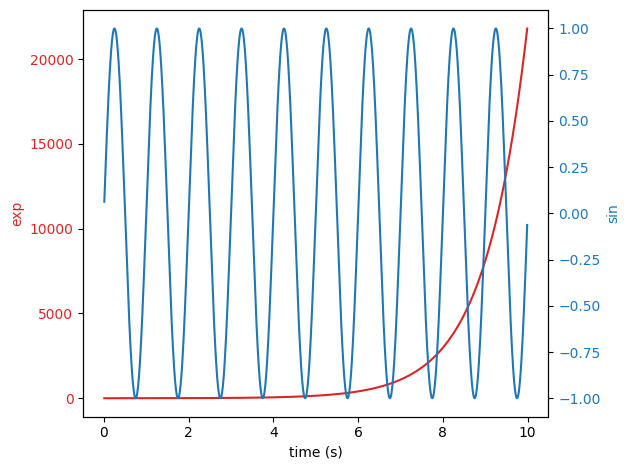

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Actual code

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import pandas as pd

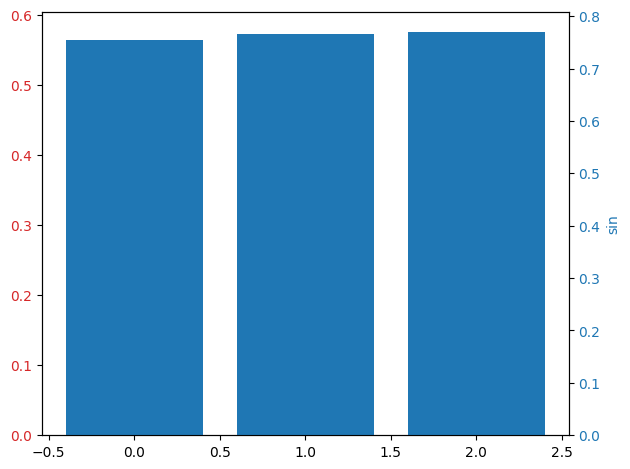

In [58]:

# Create some mock data
# t = np.arange(0, 999)

t = [0, 1, 2]
data1 = [0.555, .565, .575]
data2 = [0.755, .765, .769]
# Create some mock data
# t = np.arange(0.01, 10.0, 0.01)
# data1 = np.exp(t)
# data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
ax1.bar(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.bar(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

   amount  price names
0   0.555  0.755  orig
1   0.565  0.765   new
2   0.575  0.769  new2


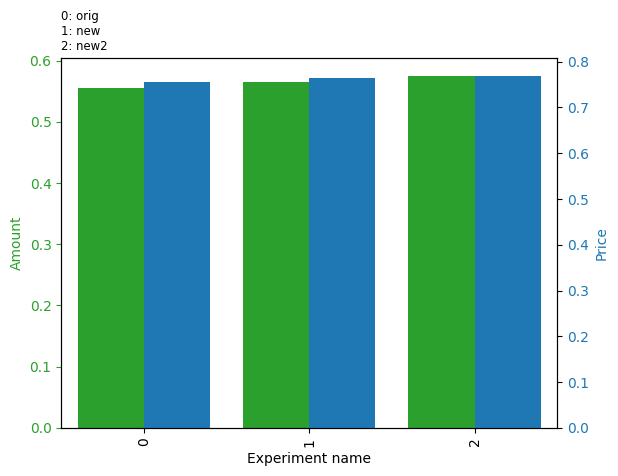

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data1 = [0.555, .565, .575]
data2 = [0.755, .765, .769]
names = ['orig', 'new', 'new2']

# df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)
df = pd.DataFrame({'amount': data1, 'price': data2, 'names': names})

print(df)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

col_1 = 'tab:green'
col_2 = 'tab:blue'
width = 0.4

df.amount.plot(kind='bar', color=col_1, ax=ax, width=width, position=1)
df.price.plot(kind='bar', color=col_2, ax=ax2, width=width, position=0)

# set x min to -1 so that the first bar is not cut off
ax.set_xlim(-.5, len(df.amount)-.5)

# add all names to title like "0: orig, 1: new, 2: new2"
title = '\n'.join([f'{i}: {name}' for i, name in enumerate(df.names)])
ax.set_title(title, loc='left', fontsize='small')
# ax.set_title('Amount and Price\nasdfasdf\nasdfasdf')
ax.set_xlabel('Experiment name')

ax.set_ylabel('Amount', color='r')
ax.yaxis.label.set_color(col_1)
ax.tick_params(axis='y', colors=col_1)
ax2.set_ylabel('Price', color=col_2)
ax2.tick_params(axis='y', labelcolor=col_2)
ax2.yaxis.label.set_color(col_2)

plt.show()

## Main function for plotting stuff

In [124]:
def plot_kripp_alpha_and_majority_agreement(
    data: str | StringIO | pd.DataFrame, to_file: str = None, title: str = None) -> None:
    if isinstance(data, str):
        df = pd.read_csv(data)
    elif isinstance(data, StringIO):
        df = pd.read_csv(data, delimiter='\t', skipinitialspace=True, header=None)
        df = df.rename(columns={0: 'experiment_name', 1: 'kripp_alpha', 2: 'majority_agreement'})        
    elif isinstance(data, pd.DataFrame):
        df = data
    else:
        raise ValueError(f'data must be either a string or a pandas DataFrame, you provided a {type(data)}\n{data}')

    assert 'experiment_name' in df.columns, f'data must have a column named "experiment_name", but it has {df.columns}'
    assert 'kripp_alpha' in df.columns, f'data must have a column named "kripp_alpha", but it has {df.columns}'
    assert 'majority_agreement' in df.columns, f'data must have a column named "majority_agreement", but it has {df.columns}'
    assert len(df) > 0, f'data must have at least one row, but it has {len(df)}'

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    col_1, col_2 = 'tab:green', 'tab:blue'
    width = 0.4

    df.kripp_alpha.plot(kind='bar', color=col_1, ax=ax, width=width, position=1)
    df.majority_agreement.plot(kind='bar', color=col_2, ax=ax2, width=width, position=0)

    # add all names to title like "0: orig, 1: new, 2: new2"
    title = r'$\bf{' + title + '}$:\n' if title else ''
    title += '\n'.join([f'{i}: {name}' for i, name in enumerate(df.experiment_name)])
    ax.set_title(title, loc='left', fontsize='small')

    ax.set_xlim(-.5, len(df.index)-.5)
    ax.set_xlabel('Experiment')

    ax.set_ylabel('Kripp Alpha <-1,1>', color=col_1)
    ax.yaxis.label.set_color(col_1)
    ax.tick_params(axis='y', colors=col_1)
    ax2.set_ylabel('Majority Agreement <0,1>', color=col_2)
    ax2.tick_params(axis='y', labelcolor=col_2)
    ax2.yaxis.label.set_color(col_2)

    plt.tight_layout()
    if to_file:
        plt.savefig(to_file)
    plt.show()

## Fuction usage

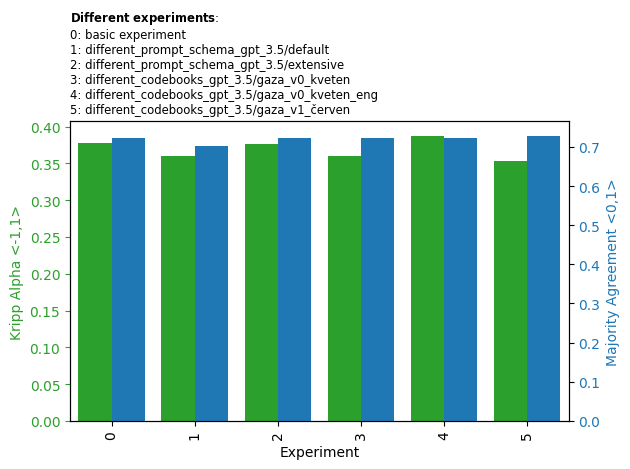

In [ ]:
data = StringIO("""basic experiment	0.3780	0.724
different_prompt_schema_gpt_3.5/default	0.3598	0.702
different_prompt_schema_gpt_3.5/extensive	0.3760	0.724
different_codebooks_gpt_3.5/gaza_v0_kveten	0.3600	0.724
different_codebooks_gpt_3.5/gaza_v0_kveten_eng	0.3878	0.722
different_codebooks_gpt_3.5/gaza_v1_červen	0.3538	0.729""")

plot_kripp_alpha_and_majority_agreement(data, to_file='kripp_alpha_and_majority_agreement.png', title='Different\ experiments')